In [8]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

Epoch 1/5
11/11 [==============================] - 5s 108ms/step - loss: 0.1339 - val_loss: 0.0772
Epoch 2/5
11/11 [==============================] - 0s 26ms/step - loss: 0.0447 - val_loss: 0.0082
Epoch 3/5
11/11 [==============================] - 0s 32ms/step - loss: 0.0144 - val_loss: 0.0048
Epoch 4/5
11/11 [==============================] - 0s 27ms/step - loss: 0.0096 - val_loss: 0.0088
Epoch 5/5
1/1 [==============================] - 0s 55ms/step - loss: 0.0077
Test Loss: 0.007678096182644367
1/1 [==============================] - 1s 600ms/step


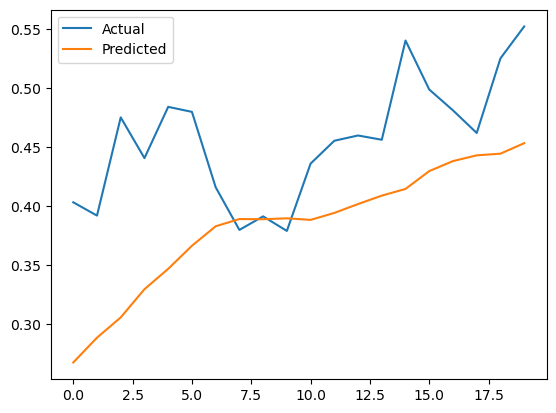

In [12]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('GOOG.csv')
close_price = df['Close'].values.reshape(-1, 1)

# Split the data into training and testing sets
train_size = int(len(close_price) * 0.8)
train_data, test_data = close_price[:train_size], close_price[train_size:]

# Scale the data to values between 0 and 1 using the MinMaxScaler from scikit-learn
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

# Define the number of time steps to be used for each input sample and the number of features in the input data
n_steps = 30
n_features = 1

# Create a function to generate the input and output sequences for the LSTM model
def generate_sequences(data, n_steps, n_features):
    X, y = [], []
    for i in range(len(data)-n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    X = np.array(X).reshape(-1, n_steps, n_features)
    y = np.array(y).reshape(-1, n_features)
    return X, y

# Use the generate_sequences() function to create the input and output sequences for the training and testing sets
X_train, y_train = generate_sequences(train_data, n_steps, n_features)
X_test, y_test = generate_sequences(test_data, n_steps, n_features)

# Build the LSTM model using the Sequential API in TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', input_shape=(n_steps, n_features)),
    tf.keras.layers.Dense(1)
])

# Compile the model and specify the loss function and optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model on the training data for a specified number of epochs
history = model.fit(X_train, y_train, epochs=5, batch_size=16, validation_data=(X_test, y_test))

# Evaluate the model on the test data and print the test loss
test_loss = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)

# Plot the predicted and actual values for the test data
y_pred = model.predict(X_test)

plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()